# 9 Data Visualization Techniques

<a href="https://www.marsja.se/python-data-visualization-techniques-you-should-learn-seaborn/">Source</a>

In [1]:
# %%writefile command1.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

## Scatter Plot

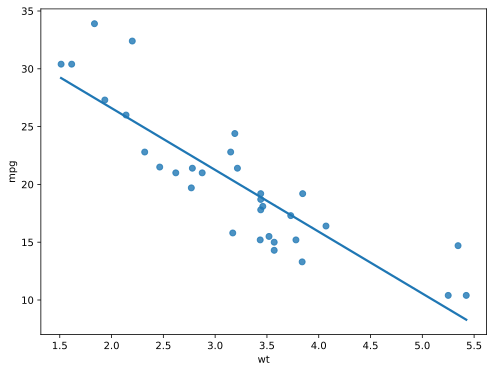

In [2]:
fig = plt.figure(figsize=(8, 6))

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')

ax = sns.regplot(x="wt", y="mpg", ci=False, data=df) # ci: confidence interval

## Histogram

<AxesSubplot:xlabel='Temp'>

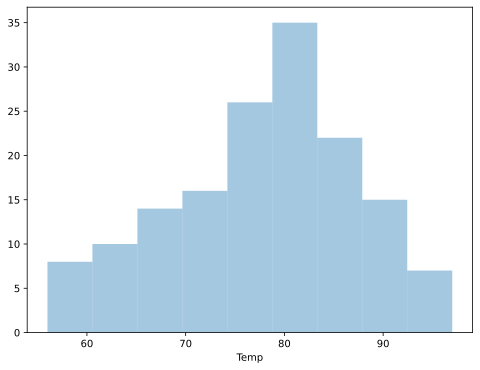

In [3]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/airquality.csv')

fig = plt.figure(figsize=(8, 6))
sns.distplot(df.Temp, kde=False)

### Grouped Histogram

[Text(0.5, 0, 'Response Time'), Text(0, 0.5, 'Frequency')]

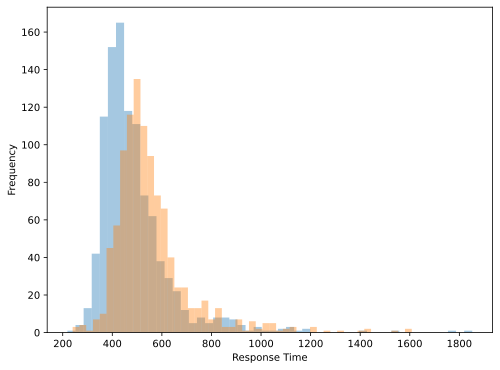

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/marsja/jupyter/master/flanks.csv', 
                 index_col=0)

fig = plt.figure(figsize=(8, 6))
for condition in df['TrialType'].unique():
    cond_data = df[(df['TrialType'] == condition)]
    ax = sns.distplot(cond_data['RT'], kde=False)

ax.set(xlabel='Response Time', ylabel='Frequency')

## Bar Plot

In [5]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv', index_col=0)
df.head()

df_grpd = df.groupby("cyl").count().reset_index()

df_grpd

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


,cyl,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,4,11,11,11,11,11,11,11,11,11,11
1,6,7,7,7,7,7,7,7,7,7,7
2,8,14,14,14,14,14,14,14,14,14,14


<AxesSubplot:xlabel='cyl', ylabel='mpg'>

[Text(0.5, 0, 'Cylinders'), Text(0, 0.5, 'Number of Cars for Each Cylinder')]

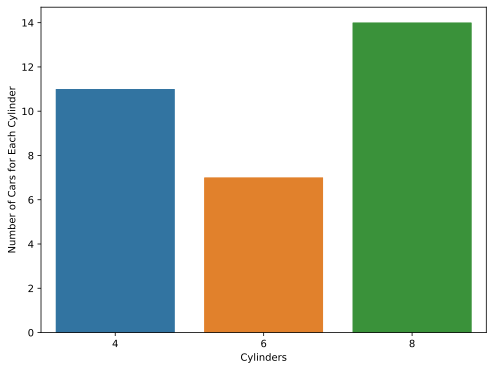

In [6]:
fig = plt.figure(figsize=(8, 6))
sns.barplot(x="cyl", y="mpg", data=df_grpd)
ax = sns.barplot(x="cyl", y="mpg", data=df_grpd)
ax.set(xlabel='Cylinders', ylabel='Number of Cars for Each Cylinder')

## Time Series Plots

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-02-26/full_trains.csv")
df.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,...,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
0,2017,9,National,PARIS EST,METZ,85.13,299,0,NaN,15,...,0.25,0.00,0.17,0.42,0.17,0.00,6.00,24.03,1.00,0.00
1,2017,9,National,REIMS,PARIS EST,47.06,218,1,NaN,10,...,0.25,0.38,0.12,0.12,0.06,0.06,9.00,21.50,1.00,0.00
2,2017,9,National,PARIS EST,STRASBOURG,116.23,333,1,NaN,20,...,0.21,0.21,0.07,0.29,0.21,0.00,14.00,24.69,3.00,0.00
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.09,481,1,NaN,36,...,0.16,0.12,0.31,0.34,0.03,0.03,40.00,34.05,21.00,5.00
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.45,190,0,NaN,16,...,0.17,0.25,0.25,0.31,0.00,0.03,26.00,28.40,8.00,1.00


<AxesSubplot:xlabel='month', ylabel='total_num_trips'>

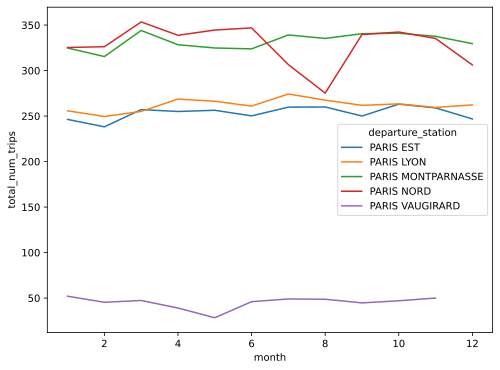

In [8]:
fig = plt.figure(figsize=(8, 6))
sns.lineplot(x="month", y="total_num_trips", hue="departure_station", 
             ci=None, data=df[df.departure_station.str.contains('PARIS')])

## Box Plots

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


<AxesSubplot:xlabel='vs', ylabel='wt'>

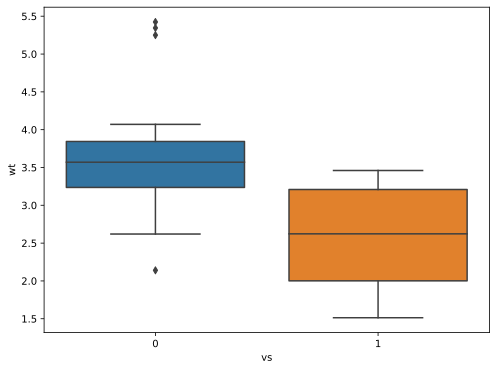

In [9]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv', index_col=0)
df.head()


fig = plt.figure(figsize=(8, 6))
sns.boxplot(x="vs", y='wt', data=df)

## Heat Map

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


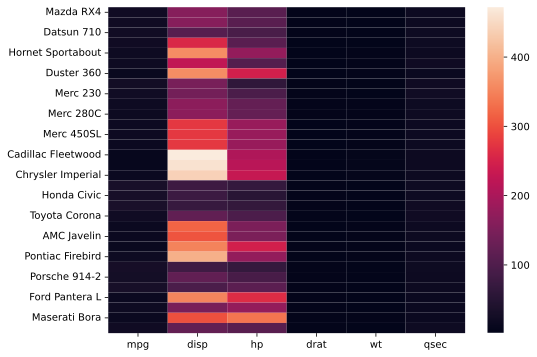

In [10]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv', index_col=0)
df.head()

fig = plt.figure(figsize=(8, 6))
ax = sns.heatmap(df[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']])

## 

## Correlogram

<AxesSubplot:>

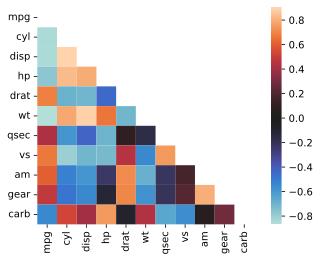

In [11]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, center=0,
            square=True,)

## Violin Plots

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


<AxesSubplot:xlabel='vs', ylabel='wt'>

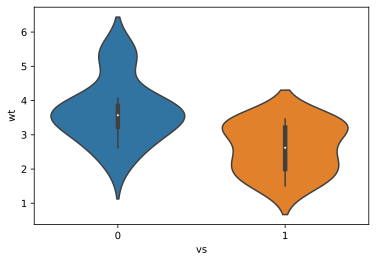

In [12]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv', index_col=0)
df.head()


sns.violinplot(x="vs", y='wt', data=df)

## Raincloud Plots

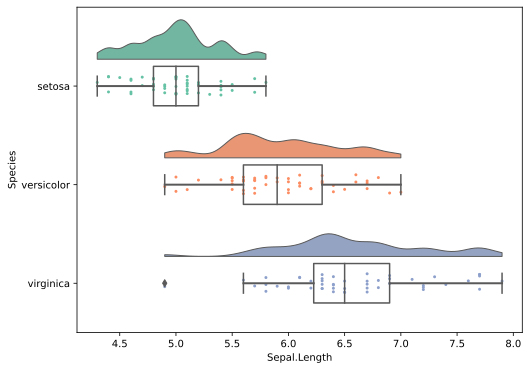

In [13]:
import ptitprince as pt

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')


fig=plt.figure(figsize=(8, 6))
ax = pt.RainCloud(x = 'Species', y = 'Sepal.Length', 
                  data = df, 
                  width_viol = .8,
                  width_box = .4,              
                  orient = 'h',
                  move = .0)